# Question 2

In [65]:
#retrieving archive data from NYT
import requests
import time
import datetime
import os
import json
import argparse
q='sports'
nyt_book=os.getenv('auth_key') #retrieve API key
if not os.path.exists('Midterm/Data/Archives'):
    os.makedirs('Midterm/Data/Archives/'+str(q)) #create dir to store json files
else:
    for i in range(2,3):
        data=requests.get('https://api.nytimes.com/svc/archive/v1/2011/10.json?q='+str(q)+'&page='+str(i)+'&api-key=df4da5f06d8e4a9b87376b0b13362694').json()
        with open('Midterm/Data/Archives/'+str(q)+'/'+str(i)+'.json','w')  as outfile:
            json.dump(data,outfile) #collect Json files
            time.sleep(0.75)

In [66]:
#create target folder to save json files
import json, os
src_loc='C:/Users/Raksha/Midterm/Data/Archives/sports/'
tgt_loc='C:/Users/Raksha/Midterm/Data/Archives/sports_split/'
if not os.path.exists(tgt_loc):
    os.makedirs(tgt_loc)
d=[]
for filename in os.listdir(src_loc):
    #print(filename)
    if filename.endswith(".json"):
        with open(src_loc+filename) as out:
            d.append(json.load(out))

In [115]:
#get the data from the json files with the key as keywords
sportsData={}
path='Midterm/Data/Archives/sports_split/'
for filename in os.listdir(path):
    if(filename.endswith('.json')):
        with open(path+filename,'r') as out:
            data=json.load(out)
            for i in range(len(data["keywords"])):
                valuee=data["keywords"][i]['value']
                monthdate=data['pub_date'][:7]
                if(monthdate not in sportsData.keys()):
                    sportsData[monthdate]={}
                    if(valuee not in sportsData[monthdate].keys()):
                        sportsData[monthdate][valuee]=1
                    else:
                        sportsData[monthdate][valuee]+=1
                else:
                    if(valuee not in sportsData[monthdate].keys()):
                        sportsData[monthdate][valuee]=1
                    else:
                        sportsData[monthdate][valuee]+=1


In [103]:
import collections
import re
from collections import Counter

In [76]:
#retrieving article search data from NYT
import requests
import time
import datetime
import os
import json
q='Obama'
#s='20150101'
#end = '20160101'

if not os.path.exists('Midterm/Data/ArticalSearch1/'+str(q)):
    os.makedirs('Midterm/Data/ArticalSearch1/'+str(q))
else:
    for i in range(0,25):
        dat=requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?q='+str(q)+'&begin_date=20160101&end_date=20160331&page='+str(i)+'&api-key=df4da5f06d8e4a9b87376b0b13362694').json()
        with open('Midterm/Data/ArticalSearch1/'+str(q)+'/'+str(i)+'.json','w')  as outfile:
            json.dump(dat,outfile) #articles from jan to march
            time.sleep(0.75)
    for k in range(0,25):
        dat=requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?q='+str(q)+'&begin_date=20160401'+'&end_date=20160630&page='+str(k)+'&api-key=df4da5f06d8e4a9b87376b0b13362694').json()
        with open('Midterm/Data/ArticalSearch1/'+str(q)+'/'+str(i+1)+'.json','w')  as outfile:
            json.dump(dat,outfile) #articles from april to june
            i=i+1
            time.sleep(0.75)
    for k in range(0,25):
        dat=requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?q='+str(q)+'&begin_date=20160701'+'&end_date=20160930&page='+str(k)+'&api-key=df4da5f06d8e4a9b87376b0b13362694').json()
        with open('Midterm/Data/ArticalSearch1/'+str(q)+'/'+str(i+1)+'.json','w')  as outfile:
            json.dump(dat,outfile) #articles from july to sep
            i=i+1
            time.sleep(0.75)
    for k in range(0,25):
        dat=requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?q='+str(q)+'&begin_date=20161001'+'&end_date=201601231&page='+str(k)+'&api-key=df4da5f06d8e4a9b87376b0b13362694').json()
        with open('Midterm/Data/ArticalSearch1/'+str(q)+'/'+str(i+1)+'.json','w')  as outfile:
            json.dump(dat,outfile) #articles from oct to dec
            i=i+1
            time.sleep(0.75)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [85]:
#create target folder to save JSON files, splitting the files
import json, os
src_loc='C:/Users/Raksha/Midterm/Data/ArticalSearch1/Obama/'
tgt_loc='C:/Users/Raksha/Midterm/Data/ArticalSearch1/Obama_split'
if not os.path.exists(tgt_loc):
    os.makedirs(tgt_loc)
d=[]
for filename in os.listdir(src_loc):
    if filename.endswith(".json"):
        with open(src_loc+filename) as out:
            d.append(json.load(out))

In [86]:
#Save all the json files
for j in range(0,len(d)):
    if('response' in d[j].keys()):
        for i in range(0,len(d[j]['response']['docs'])):
            pubdate=d[j]['response']['docs'][i]['pub_date'][:10]
            with open(tgt_loc+'/'+str(d[j]['response']['docs'][i]['_id'])+'-'+str(pubdate)+'.json','w') as outfile:
                json.dump(d[j]['response']['docs'][i],outfile)

In [111]:
#dictionary having all the keywords of the data retrieved from article search
obamaData={}
path='Midterm/Data/ArticalSearch1/Obama_split/'
for filename in os.listdir(path):
    if(filename.endswith('.json')):
        with open(path+filename,'r') as out:
            data=json.load(out)
            for i in range(len(data["keywords"])):
                valuee=data["keywords"][i]['value']
                monthdate=data['pub_date'][:7]
                if(monthdate not in obamaData.keys()):
                    obamaData[monthdate]={}
                    if(valuee not in obamaData[monthdate].keys()):
                        obamaData[monthdate][valuee]=1
                    else:
                        obamaData[monthdate][valuee]+=1
                else:
                    if(valuee not in obamaData[monthdate].keys()):
                        obamaData[monthdate][valuee]=1
                    else:
                        obamaData[monthdate][valuee]+=1


## Analysis 1: Creating a dataframe to store all the data retrieved from article search

In [159]:
import pandas as pd

dataf1 = pd.DataFrame(obamaData)
dataf1.columns = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
dataf1.head()

,Jan,Feb,March,April,May,June,July,August,September
ALLERGAN INC,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
"Abadi, Haider al-",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
"Abe, Shinzo",NaN,NaN,NaN,NaN,7.0,1.0,NaN,NaN,NaN
Aetna Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Afghan National Security Forces,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis 2: Plot of the frequency of the coverage og topics in each month

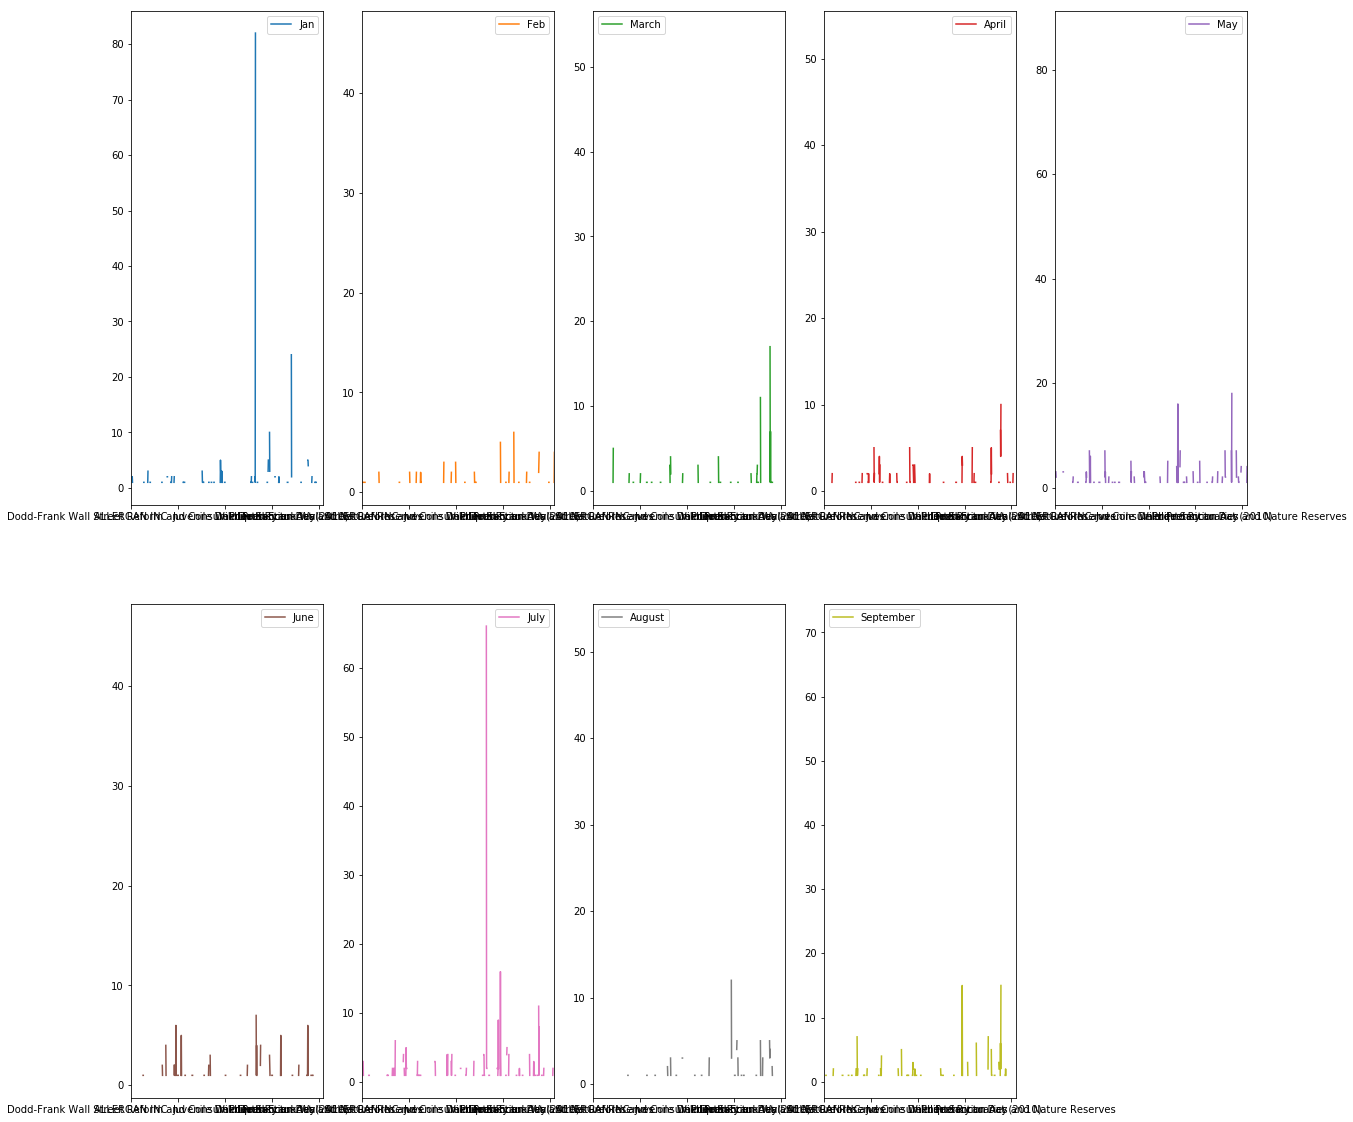

In [160]:
import matplotlib.pyplot as plt
dataf1.plot(subplots=True, layout=(2, -1), figsize=(20, 20), sharex=False);
plt.show()

## Analysis 3: Creating a dataframe to store all the data retrieved from article search

In [172]:
#store all the dictionary data into a dataframe
import pandas as pd
dataf = pd.DataFrame(sportsData)
dataf

,2011-10
"""60 Minutes"" (TV Program)",1
"""Footloose' (Movie)",1
1 World Trade Center (NYC),1
1821 Comics,1
22nd Century Group Inc,1
3LD Art & Technology Center,1
3M Company,1
"401(k), 403(b) and 457 Plans",2
59E59 Theaters,1
60 Minutes (TV Program),1


## Analysis 4: Frequency plot of data retrieved from archive files

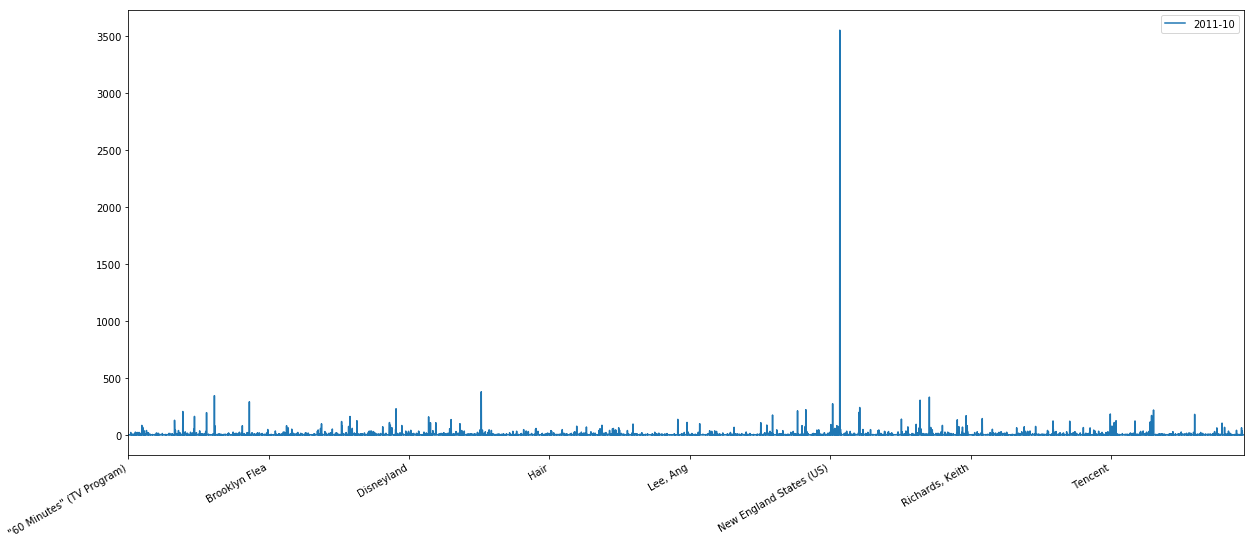

In [166]:
import matplotlib.pyplot as plt
dataf.plot(subplots=True, layout=(2, -1), figsize=(20, 20), sharex=True);
plt.show()